# MINTILO AI

An open source project dedicated to utilizing Python and machine learning techniques to provide insights for policy makers in eradicating child mortality in developing countries. By analyzing data from DHS surveys, MINTILO AI identifies risk factors associated with child mortality, leveraging artificial intelligence to contribute to the collective efforts in improving child survival rates.

Copyright © 2023 Kofiya Technologies

# 1. Load data

In [1]:
# Import dependence
import numpy as np
import pandas as pd

In [2]:
# Load data     ####################################################################################################################
filepath_data = r'D:\PycharmProjects\mintilo-ai\data\processed_mintilo_ai_community_version.csv'

with open(filepath_data, 'rb') as fp:
    df = pd.read_csv(fp)

In [3]:
# Check data shape
df.shape

(8755, 19)

In [4]:
# Check data
df.head()

,survey_country,survey_year,place_of_residence,age_mother,n_antenatal_visits_during_pregnancy,n_household_members,toilet_facility_type,time_to_water_source_in_minutes,wealth_index_factor_score_combined_mother,sex_child,delivery_by_caesarean_section,delivery_place,education_mother,water_source_drinking,age_at_first_birth,is_child_alive,region,age_child_months,contraceptive_method_current
0,ET7,2008,rural,35,NaN,9,no_facilitybushfield,60.0,poorest,female,no,respondents_home,0,riverdamlakepondsstreamcanalirrigation_channel,16,yes,amhara,36,not_using
1,ET7,2008,rural,32,NaN,7,pit_latrine_without_slabopen_pit,50.0,richest,male,no,respondents_home,0,public_tapstandpipe,16,yes,tigray,53,not_using
2,ET7,2008,rural,27,NaN,8,no_facilitybushfield,20.0,poorest,female,no,respondents_home,0,unprotected_spring,16,yes,amhara,58,not_using
3,ET7,2008,rural,38,1.0,6,pit_latrine_without_slabopen_pit,20.0,richest,male,no,respondents_home,0,tube_well_or_borehole,17,yes,amhara,36,not_using
4,ET7,2008,urban,24,5.0,5,pit_latrine_with_slab,10.0,richest,male,no,government_hospital,10,public_tapstandpipe,21,yes,snnpr,32,pill


In [5]:
# Drop survey identifier variables  #################################################
df.drop(['survey_country', 'survey_year'], axis='columns', inplace=True)

df.shape

(8755, 17)

# 2. Explore data (EDA)

In [6]:
# Import library
from ydata_profiling import ProfileReport

In [7]:
# Generate EDA report
profile_report = ProfileReport(df, title="DHS U5 Mortality", minimal=True)

In [8]:
# Display EDA report
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Build Machine Learning (ML) models

In [9]:
# Derive label / target variable  ###################################################################
df['HasChildDiedU5'] = np.where(df['is_child_alive'] == 'yes', 
                                0, 
                                np.where((df['is_child_alive'] == 'no') & (df['age_child_months'] <= 60),
                                         1,
                                         -999))


# Sanity checks
df[['is_child_alive', 'age_child_months', 'HasChildDiedU5']]

,is_child_alive,age_child_months,HasChildDiedU5
0,yes,36,0
1,yes,53,0
2,yes,58,0
3,yes,36,0
4,yes,32,0
...,...,...,...
8750,yes,5,0
8751,yes,12,0
8752,yes,40,0
8753,yes,48,0


In [10]:
# Further sanity checks
df['is_child_alive'].value_counts()

yes    8218
no      537
Name: is_child_alive, dtype: int64

In [11]:
# Further sanity checks
df['HasChildDiedU5'].value_counts()

0    8218
1     537
Name: HasChildDiedU5, dtype: int64

In [12]:
# Further sanity checks
df['HasChildDiedU5'].unique()

array([0, 1])

In [13]:
# Drop old variable that is used to compute the target / label variable
df.drop(['is_child_alive'], axis='columns', inplace=True)

df.shape

(8755, 17)

## 3.1 Split data into training / validation sets

In [14]:
# Get label and features  ##########################################################################
X = df.drop(['HasChildDiedU5'], axis='columns')
y = df[['HasChildDiedU5']]

In [15]:
# Check data
X.head()

,place_of_residence,age_mother,n_antenatal_visits_during_pregnancy,n_household_members,toilet_facility_type,time_to_water_source_in_minutes,wealth_index_factor_score_combined_mother,sex_child,delivery_by_caesarean_section,delivery_place,education_mother,water_source_drinking,age_at_first_birth,region,age_child_months,contraceptive_method_current
0,rural,35,NaN,9,no_facilitybushfield,60.0,poorest,female,no,respondents_home,0,riverdamlakepondsstreamcanalirrigation_channel,16,amhara,36,not_using
1,rural,32,NaN,7,pit_latrine_without_slabopen_pit,50.0,richest,male,no,respondents_home,0,public_tapstandpipe,16,tigray,53,not_using
2,rural,27,NaN,8,no_facilitybushfield,20.0,poorest,female,no,respondents_home,0,unprotected_spring,16,amhara,58,not_using
3,rural,38,1.0,6,pit_latrine_without_slabopen_pit,20.0,richest,male,no,respondents_home,0,tube_well_or_borehole,17,amhara,36,not_using
4,urban,24,5.0,5,pit_latrine_with_slab,10.0,richest,male,no,government_hospital,10,public_tapstandpipe,21,snnpr,32,pill


In [16]:
y.head()

,HasChildDiedU5
0,0
1,0
2,0
3,0
4,0


In [17]:
# Get list of categorical and numeric features  ###################################################
# We can use dataframe.info() to derive type of features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8755 entries, 0 to 8754
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   place_of_residence                         8755 non-null   object 
 1   age_mother                                 8755 non-null   int64  
 2   n_antenatal_visits_during_pregnancy        5842 non-null   float64
 3   n_household_members                        8755 non-null   int64  
 4   toilet_facility_type                       8755 non-null   object 
 5   time_to_water_source_in_minutes            8715 non-null   float64
 6   wealth_index_factor_score_combined_mother  8755 non-null   object 
 7   sex_child                                  8755 non-null   object 
 8   delivery_by_caesarean_section              8755 non-null   object 
 9   delivery_place                             8755 non-null   object 
 10  education_mother        

In [18]:
features_cat = X.select_dtypes(include='object').columns.tolist()
features_num = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", features_cat)
print("\nNumerical Features:", features_num)

Categorical Features: ['place_of_residence', 'toilet_facility_type', 'wealth_index_factor_score_combined_mother', 'sex_child', 'delivery_by_caesarean_section', 'delivery_place', 'water_source_drinking', 'region', 'contraceptive_method_current']

Numerical Features: ['age_mother', 'n_antenatal_visits_during_pregnancy', 'n_household_members', 'time_to_water_source_in_minutes', 'education_mother', 'age_at_first_birth', 'age_child_months']


In [19]:
# Split data into training and validation sets  #################################################
from sklearn.model_selection import train_test_split

RANDOM_STATE = 101
TEST_SIZE = 0.20

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, 
                                                  test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Sanity checks
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('\n')
print('X_val', X_val.shape)
print('y_val', y_val.shape)
print('\n')
print('Mortality rate (TRAIN):\n', y_train['HasChildDiedU5'].value_counts(dropna=False, normalize=True).round(2) * 100)
print('\nMortality rate (VAL):\n', y_val['HasChildDiedU5'].value_counts(dropna=False, normalize=True).round(2) * 100)

X_train (7004, 16)
y_train (7004, 1)


X_val (1751, 16)
y_val (1751, 1)


Mortality rate (TRAIN):
 0    94.0
1     6.0
Name: HasChildDiedU5, dtype: float64

Mortality rate (VAL):
 0    94.0
1     6.0
Name: HasChildDiedU5, dtype: float64


## 3.2 Impute missing values

In [20]:
# Get data by feature type
X_train_cat = X_train[features_cat]
X_val_cat = X_val[features_cat]

X_train_num = X_train[features_num]
X_val_num = X_val[features_num]

In [21]:
X_train_cat.head()

,place_of_residence,toilet_facility_type,wealth_index_factor_score_combined_mother,sex_child,delivery_by_caesarean_section,delivery_place,water_source_drinking,region,contraceptive_method_current
3302,rural,no_facilitybushfield,middle,male,no,government_health_center,unprotected_spring,oromia,implantsnorplant
539,rural,no_facilitybushfield,middle,male,no,respondents_home,riverdamlakepondsstreamcanalirrigation_channel,somali,not_using
4531,rural,no_facilitybushfield,poorest,female,no,respondents_home,riverdamlakepondsstreamcanalirrigation_channel,afar,not_using
4076,rural,pit_latrine_without_slabopen_pit,poorer,female,no,government_hospital,riverdamlakepondsstreamcanalirrigation_channel,snnpr,not_using
7116,urban,pit_latrine_without_slabopen_pit,richest,male,no,government_health_center,piped_to_yardplot,afar,injections


In [22]:
X_train_num.head()

,age_mother,n_antenatal_visits_during_pregnancy,n_household_members,time_to_water_source_in_minutes,education_mother,age_at_first_birth,age_child_months
3302,25,3.0,5,90.0,3,16,41
539,18,4.0,2,60.0,10,16,19
4531,35,0.0,7,360.0,0,17,25
4076,32,0.0,5,90.0,0,24,4
7116,20,3.0,3,0.0,3,17,28


In [23]:
# Check missing data in categorical features
# IMPORTANT - No missing data!
X_train_cat.isnull().sum()

place_of_residence                           0
toilet_facility_type                         0
wealth_index_factor_score_combined_mother    0
sex_child                                    0
delivery_by_caesarean_section                0
delivery_place                               0
water_source_drinking                        0
region                                       0
contraceptive_method_current                 0
dtype: int64

In [24]:
# Check missing data in numeric features
# IMPORTANT - Two features have missing data!
X_train_num.isnull().sum()

age_mother                                0
n_antenatal_visits_during_pregnancy    2312
n_household_members                       0
time_to_water_source_in_minutes          31
education_mother                          0
age_at_first_birth                        0
age_child_months                          0
dtype: int64

In [25]:
# Impute categorical features     ###############################################################################################################
# IMPORTANT - Although no missing data here, we show the framework for imputing missing data!

from sklearn.impute import SimpleImputer

# Apply imputer
imputer_cat = SimpleImputer(strategy='most_frequent')

X_train_cat_imputed = imputer_cat.fit_transform(X_train_cat)
X_train_cat_imputed = pd.DataFrame(X_train_cat_imputed, columns=X_train_cat.columns)

# Sanity checks
print('Number of missing values (BEFORE):\n', X_train_cat.isnull().sum())
print('\nNumber of missing values (AFTER):\n', X_train_cat_imputed.isnull().sum())

Number of missing values (BEFORE):
 place_of_residence                           0
toilet_facility_type                         0
wealth_index_factor_score_combined_mother    0
sex_child                                    0
delivery_by_caesarean_section                0
delivery_place                               0
water_source_drinking                        0
region                                       0
contraceptive_method_current                 0
dtype: int64

Number of missing values (AFTER):
 place_of_residence                           0
toilet_facility_type                         0
wealth_index_factor_score_combined_mother    0
sex_child                                    0
delivery_by_caesarean_section                0
delivery_place                               0
water_source_drinking                        0
region                                       0
contraceptive_method_current                 0
dtype: int64


In [26]:
# Impute validation set as well
X_val_cat_imputed = imputer_cat.transform(X_val_cat)
X_val_cat_imputed = pd.DataFrame(X_val_cat_imputed, columns=X_val_cat.columns)

# Sanity checks
print('Number of missing values (BEFORE):\n', X_val_cat.isnull().sum())
print('\nNumber of missing values (AFTER):\n', X_val_cat_imputed.isnull().sum())

Number of missing values (BEFORE):
 place_of_residence                           0
toilet_facility_type                         0
wealth_index_factor_score_combined_mother    0
sex_child                                    0
delivery_by_caesarean_section                0
delivery_place                               0
water_source_drinking                        0
region                                       0
contraceptive_method_current                 0
dtype: int64

Number of missing values (AFTER):
 place_of_residence                           0
toilet_facility_type                         0
wealth_index_factor_score_combined_mother    0
sex_child                                    0
delivery_by_caesarean_section                0
delivery_place                               0
water_source_drinking                        0
region                                       0
contraceptive_method_current                 0
dtype: int64


In [27]:
# Impute numeric features     ###############################################################################################################
imputer_num = SimpleImputer(strategy='median')

X_train_num_imputed = imputer_num.fit_transform(X_train_num)
X_train_num_imputed = pd.DataFrame(X_train_num_imputed, columns=X_train_num.columns)

# Sanity checks
print('Number of missing values (BEFORE):\n', X_train_num.isnull().sum())
print('\nNumber of missing values (AFTER):\n', X_train_num_imputed.isnull().sum())

Number of missing values (BEFORE):
 age_mother                                0
n_antenatal_visits_during_pregnancy    2312
n_household_members                       0
time_to_water_source_in_minutes          31
education_mother                          0
age_at_first_birth                        0
age_child_months                          0
dtype: int64

Number of missing values (AFTER):
 age_mother                             0
n_antenatal_visits_during_pregnancy    0
n_household_members                    0
time_to_water_source_in_minutes        0
education_mother                       0
age_at_first_birth                     0
age_child_months                       0
dtype: int64


In [28]:
# Impute validation set as well
X_val_num_imputed = imputer_num.transform(X_val_num)
X_val_num_imputed = pd.DataFrame(X_val_num_imputed, columns=X_val_num.columns)

# Sanity checks
print('Number of missing values (BEFORE):\n', X_val_num.isnull().sum())
print('\nNumber of missing values (AFTER):\n', X_val_num_imputed.isnull().sum())

Number of missing values (BEFORE):
 age_mother                               0
n_antenatal_visits_during_pregnancy    601
n_household_members                      0
time_to_water_source_in_minutes          9
education_mother                         0
age_at_first_birth                       0
age_child_months                         0
dtype: int64

Number of missing values (AFTER):
 age_mother                             0
n_antenatal_visits_during_pregnancy    0
n_household_members                    0
time_to_water_source_in_minutes        0
education_mother                       0
age_at_first_birth                     0
age_child_months                       0
dtype: int64


In [29]:
# Save imputers for future use   ####################################################################################################

# Import library
import pickle
    
filepath_imputer_cat = r'D:\PycharmProjects\mintilo-ai\mintilo_ai\imputer_cat.pkl'
with open(filepath_imputer_cat, 'wb') as pkl:
    pickle.dump(imputer_cat, pkl)

filepath_imputer_num = r'D:\PycharmProjects\mintilo-ai\mintilo_ai\imputer_num.pkl'
with open(filepath_imputer_num, 'wb') as pkl:
    pickle.dump(imputer_num, pkl)

## 3.3 Feature scaling or normalization for numeric features

In [30]:
# Feature scaling for numeric variables   ############################################################################################

# Import library
from sklearn.preprocessing import StandardScaler

# Apply feature scaling
scaler = StandardScaler()

X_train_num_scaler = scaler.fit_transform(X_train_num_imputed)
X_train_num_scaler = pd.DataFrame(X_train_num_scaler, columns=X_train_num_imputed.columns)

# Sanity checks
X_train_num_scaler.head()

,age_mother,n_antenatal_visits_during_pregnancy,n_household_members,time_to_water_source_in_minutes,education_mother,age_at_first_birth,age_child_months
0,-0.555015,0.151325,-0.332368,0.536993,0.224894,-0.986075,0.783258
1,-1.673347,0.652213,-1.730510,0.137089,2.112279,-0.986075,-0.453707
2,1.042603,-1.351340,0.599727,4.136130,-0.583985,-0.689825,-0.116353
3,0.563318,-1.351340,-0.332368,0.536993,-0.583985,1.383922,-1.297091
4,-1.353824,0.151325,-1.264463,-0.662719,0.224894,-0.689825,0.052324


In [31]:
# Scale validation data as well
X_val_num_scaler = scaler.transform(X_val_num_imputed)
X_val_num_scaler = pd.DataFrame(X_val_num_scaler, columns=X_val_num_imputed.columns)

# Sanity checks
X_val_num_scaler.head()

,age_mother,n_antenatal_visits_during_pregnancy,n_household_members,time_to_water_source_in_minutes,education_mother,age_at_first_birth,age_child_months
0,1.042603,-1.351340,-1.264463,-0.262815,-0.583985,1.383922,-0.847286
1,-0.874538,2.154878,-0.332368,-0.262815,-0.583985,-0.097326,-0.172578
2,-0.075729,1.653989,2.463916,-0.462767,0.224894,-0.393576,0.502129
3,-0.075729,0.151325,0.133679,-0.662719,2.112279,1.087673,1.514191
4,-0.235491,0.151325,-0.332368,-0.596069,-0.583985,-0.097326,0.951934


In [32]:
# Save scaler for later use
filepath_scaler = r'D:\PycharmProjects\mintilo-ai\mintilo_ai\scaler.pkl'
with open(filepath_scaler, 'wb') as pkl:
    pickle.dump(scaler, pkl)

## 3.4 One-Hot Encoding for categorical features

In [33]:
# Check data before Encoding!
X_train_cat_imputed.head()

,place_of_residence,toilet_facility_type,wealth_index_factor_score_combined_mother,sex_child,delivery_by_caesarean_section,delivery_place,water_source_drinking,region,contraceptive_method_current
0,rural,no_facilitybushfield,middle,male,no,government_health_center,unprotected_spring,oromia,implantsnorplant
1,rural,no_facilitybushfield,middle,male,no,respondents_home,riverdamlakepondsstreamcanalirrigation_channel,somali,not_using
2,rural,no_facilitybushfield,poorest,female,no,respondents_home,riverdamlakepondsstreamcanalirrigation_channel,afar,not_using
3,rural,pit_latrine_without_slabopen_pit,poorer,female,no,government_hospital,riverdamlakepondsstreamcanalirrigation_channel,snnpr,not_using
4,urban,pit_latrine_without_slabopen_pit,richest,male,no,government_health_center,piped_to_yardplot,afar,injections


In [34]:
# Import library
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_cat_encoded = encoder.fit_transform(X_train_cat_imputed)
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names_out(features_cat))

# Sanity checks after Encoding!
X_train_cat_encoded.head()

,place_of_residence_rural,place_of_residence_urban,toilet_facility_type_bucket_toilet,toilet_facility_type_composting_toilet,toilet_facility_type_flush_dont_know_where,toilet_facility_type_flush_to_piped_sewer_system,toilet_facility_type_flush_to_pit_latrine,toilet_facility_type_flush_to_septic_tank,toilet_facility_type_flush_to_somewhere_else,toilet_facility_type_hanging_toiletlatrine,...,contraceptive_method_current_implantsnorplant,contraceptive_method_current_injections,contraceptive_method_current_iud,contraceptive_method_current_lactational_amenorrhea_lam,contraceptive_method_current_male_condom,contraceptive_method_current_not_using,contraceptive_method_current_periodic_abstinence,contraceptive_method_current_pill,contraceptive_method_current_standard_days_method_sdm,contraceptive_method_current_withdrawal
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Encode validation data set as well
X_val_cat_encoded = encoder.transform(X_val_cat_imputed)
X_val_cat_encoded = pd.DataFrame(X_val_cat_encoded.toarray(), columns=encoder.get_feature_names_out(features_cat))

# Sanity checks after Encoding!
X_val_cat_encoded.head()

,place_of_residence_rural,place_of_residence_urban,toilet_facility_type_bucket_toilet,toilet_facility_type_composting_toilet,toilet_facility_type_flush_dont_know_where,toilet_facility_type_flush_to_piped_sewer_system,toilet_facility_type_flush_to_pit_latrine,toilet_facility_type_flush_to_septic_tank,toilet_facility_type_flush_to_somewhere_else,toilet_facility_type_hanging_toiletlatrine,...,contraceptive_method_current_implantsnorplant,contraceptive_method_current_injections,contraceptive_method_current_iud,contraceptive_method_current_lactational_amenorrhea_lam,contraceptive_method_current_male_condom,contraceptive_method_current_not_using,contraceptive_method_current_periodic_abstinence,contraceptive_method_current_pill,contraceptive_method_current_standard_days_method_sdm,contraceptive_method_current_withdrawal
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Save encoder for later use
filepath_encoder = r'D:\PycharmProjects\mintilo-ai\mintilo_ai\encoder.pkl'
with open(filepath_encoder, 'wb') as pkl:
    pickle.dump(encoder, pkl)

## 3.5 Combine processed data

In [37]:
# Combine data - TRAIN
X_train_ready = pd.concat([X_train_num_scaler, X_train_cat_encoded], axis='columns')

print('X_train_ready', X_train_ready.shape)
print('\n')

X_train_ready.head()

X_train_ready (7004, 79)




,age_mother,n_antenatal_visits_during_pregnancy,n_household_members,time_to_water_source_in_minutes,education_mother,age_at_first_birth,age_child_months,place_of_residence_rural,place_of_residence_urban,toilet_facility_type_bucket_toilet,...,contraceptive_method_current_implantsnorplant,contraceptive_method_current_injections,contraceptive_method_current_iud,contraceptive_method_current_lactational_amenorrhea_lam,contraceptive_method_current_male_condom,contraceptive_method_current_not_using,contraceptive_method_current_periodic_abstinence,contraceptive_method_current_pill,contraceptive_method_current_standard_days_method_sdm,contraceptive_method_current_withdrawal
0,-0.555015,0.151325,-0.332368,0.536993,0.224894,-0.986075,0.783258,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.673347,0.652213,-1.730510,0.137089,2.112279,-0.986075,-0.453707,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.042603,-1.351340,0.599727,4.136130,-0.583985,-0.689825,-0.116353,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.563318,-1.351340,-0.332368,0.536993,-0.583985,1.383922,-1.297091,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.353824,0.151325,-1.264463,-0.662719,0.224894,-0.689825,0.052324,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Combine data - VALIDATION
X_val_ready = pd.concat([X_val_num_scaler, X_val_cat_encoded], axis='columns')

print('X_val_ready', X_val_ready.shape)
print('\n')

X_val_ready.head()

X_val_ready (1751, 79)




,age_mother,n_antenatal_visits_during_pregnancy,n_household_members,time_to_water_source_in_minutes,education_mother,age_at_first_birth,age_child_months,place_of_residence_rural,place_of_residence_urban,toilet_facility_type_bucket_toilet,...,contraceptive_method_current_implantsnorplant,contraceptive_method_current_injections,contraceptive_method_current_iud,contraceptive_method_current_lactational_amenorrhea_lam,contraceptive_method_current_male_condom,contraceptive_method_current_not_using,contraceptive_method_current_periodic_abstinence,contraceptive_method_current_pill,contraceptive_method_current_standard_days_method_sdm,contraceptive_method_current_withdrawal
0,1.042603,-1.351340,-1.264463,-0.262815,-0.583985,1.383922,-0.847286,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.874538,2.154878,-0.332368,-0.262815,-0.583985,-0.097326,-0.172578,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.075729,1.653989,2.463916,-0.462767,0.224894,-0.393576,0.502129,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.075729,0.151325,0.133679,-0.662719,2.112279,1.087673,1.514191,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.235491,0.151325,-0.332368,-0.596069,-0.583985,-0.097326,0.951934,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.6 Build ML models

In [39]:
# Convert label from Pandas data frame to numpy for ML training
y_train = y_train.to_numpy().flatten()
y_val = y_val.to_numpy().flatten()

In [40]:
y_train.shape

(7004,)

In [41]:
type(y_train)

numpy.ndarray

In [42]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
# Sanity checks for distribution of child deaths
np.unique(y_train, return_counts=True)

(array([0, 1]), array([6574,  430], dtype=int64))

In [44]:
np.unique(y_val, return_counts=True)

(array([0, 1]), array([1644,  107], dtype=int64))

In [45]:
df['HasChildDiedU5'].unique()

array([0, 1])

In [46]:
# np.isnan(y_train).any()

pd.isnull(y_train).any()

False

### General Linear Model (Logistic regression model)

In [47]:
# Import library
from sklearn.linear_model import LogisticRegression

# Train ML model
RANDOM_STATE = 101

model_lr = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)

model_lr.fit(X_train_ready, y_train)

LogisticRegression(max_iter=1000, random_state=101)

In [48]:
# Evaluate model
y_pred_lr = model_lr.predict(X_val_ready)

In [49]:
y_pred_lr[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
# Evaluate model performance using Confusion matrix and ROC #################################################################################################
from sklearn.metrics import confusion_matrix

# Get confusion matrix
confusion_matrix(y_true=y_val, y_pred=y_pred_lr)

array([[1637,    7],
       [  85,   22]], dtype=int64)

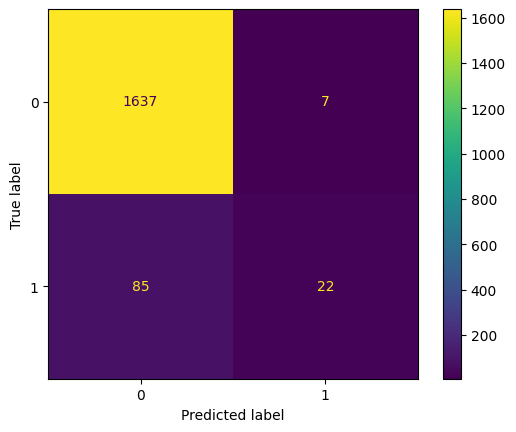

In [51]:
# Display confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_true=y_val, y_pred=y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=model_lr.classes_)
disp.plot()

plt.show()

In [52]:
# Calculate AUC
from sklearn.metrics import roc_auc_score

# Calculate prediction probability before calculating AUC
y_pred_prob_lr = model_lr.predict_proba(X_val_ready)
print('y_pred_prob_lr\n', y_pred_prob_lr[:10])

y_pred_prob_lr
 [[8.75034458e-01 1.24965542e-01]
 [9.91027889e-01 8.97211142e-03]
 [9.99484526e-01 5.15474094e-04]
 [9.99993575e-01 6.42520458e-06]
 [9.99319969e-01 6.80031101e-04]
 [9.99691554e-01 3.08445972e-04]
 [9.04840233e-01 9.51597671e-02]
 [8.46341976e-01 1.53658024e-01]
 [9.98255092e-01 1.74490774e-03]
 [6.74455297e-01 3.25544703e-01]]


In [53]:
auc_lr = roc_auc_score(y_val, y_pred_prob_lr[:, -1])
auc_lr

0.8777599654364783

In [54]:
# Plot ROC
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, th_lr = roc_curve(y_val, y_pred_prob_lr[:, -1])

In [55]:
# Custom function to plot ROC curve
def plot_roc_curve(fpr_list, tpr_list, label_list=None, auc_list=None):  
    assert isinstance(fpr_list, list), 'Please pass FPR in a list, e.g., [fpr_lr]'
    assert isinstance(tpr_list, list), 'Please pass TPR in a list, e.g., [fpr_lr]'
    
    if label_list is not None:
        assert isinstance(label_list, list), 'Please pass label in a list, e.g., [label_lr]'
        
    if auc_list is not None:
        assert isinstance(auc_list, list), 'Please pass AUC in a list, e.g., [auc_lr]'
    
    if label_list is None:
        label_list = [None] * len(fpr_list)
        
    if auc_list is None:
        auc_list = [None] * len(fpr_list)
        
    for fpr, tpr, label, auc in zip(fpr_list, tpr_list, label_list, auc_list):
        plt.plot(fpr, tpr, linewidth=2, 
                 label=''.join([label, ' (auc = ', str(round(auc * 100, 1)), '%)']) if label is not None else None,
                )
        plt.plot([0, 1], [0, 1], color='0.8')

        plt.xlabel("FPR (1 - Specificity)")
        plt.ylabel("TPR (Sensitivity)")
        
        if label is not None and auc is not None:
            plt.legend()

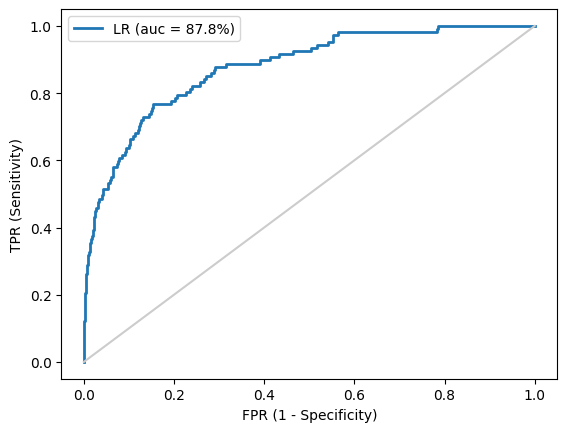

In [56]:
# Plot ROC for logistic regression model
plot_roc_curve([fpr_lr], [tpr_lr], label_list=['LR'], auc_list=[auc_lr])

## K-nearest Neighbors Model

In [57]:
# Load library
from sklearn.neighbors import KNeighborsClassifier

# Set Hyperparameters
N_NEIGHBORS = 10

# Train model
model_knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)

model_knn.fit(X_train_ready, y_train)

KNeighborsClassifier(n_neighbors=10)

In [58]:
# Evaluate model
y_pred_knn = model_knn.predict(X_val_ready)

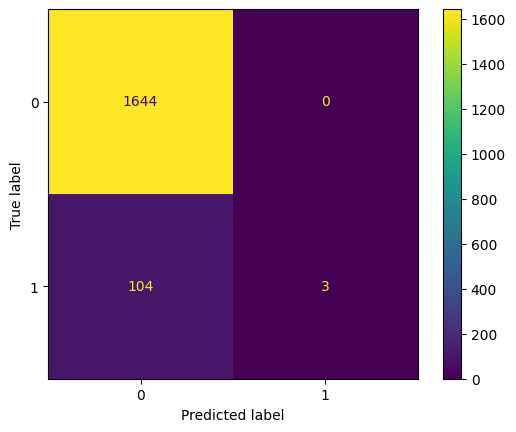

In [59]:
# Display confusion matrix
cm_knn = confusion_matrix(y_true=y_val, y_pred=y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=model_knn.classes_)
disp.plot()

plt.show()

In [60]:
# Calculate AUC
y_pred_prob_knn = model_knn.predict_proba(X_val_ready)

auc_knn = roc_auc_score(y_val, y_pred_prob_knn[:, -1])
auc_knn

0.7811697023444073

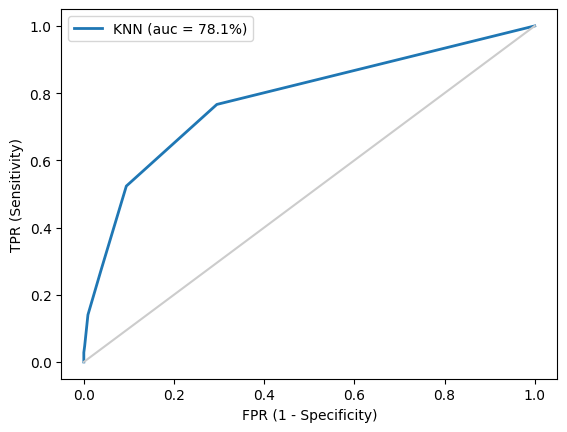

In [61]:
# ROC for KNN
fpr_knn, tpr_knn, th_knn = roc_curve(y_val, y_pred_prob_knn[:, -1])

plot_roc_curve([fpr_knn], [tpr_knn], label_list=['KNN'], auc_list=[auc_knn])

### Random Forest Model

In [62]:
# Load library
from sklearn.ensemble import RandomForestClassifier

# Set Hyperparameters
N_TREES = 250
N_DEPTH = 3

# Train model
model_rf = RandomForestClassifier(n_estimators=N_TREES, max_depth=N_DEPTH, random_state=RANDOM_STATE)

model_rf.fit(X_train_ready, y_train)

RandomForestClassifier(max_depth=3, n_estimators=250, random_state=101)

In [63]:
# Evaluate model
y_pred_rf = model_rf.predict(X_val_ready)

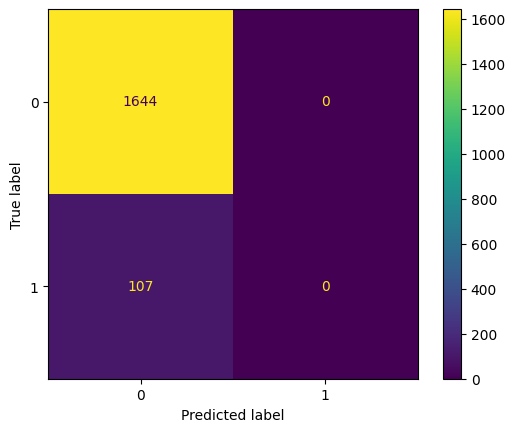

In [64]:
# Display confusion matrix
cm_rf = confusion_matrix(y_true=y_val, y_pred=y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)
disp.plot()

plt.show()

In [65]:
# Calculate AUC
y_pred_prob_rf = model_rf.predict_proba(X_val_ready)

auc_rf = roc_auc_score(y_val, y_pred_prob_rf[:, -1])
auc_rf

0.8365622939263705

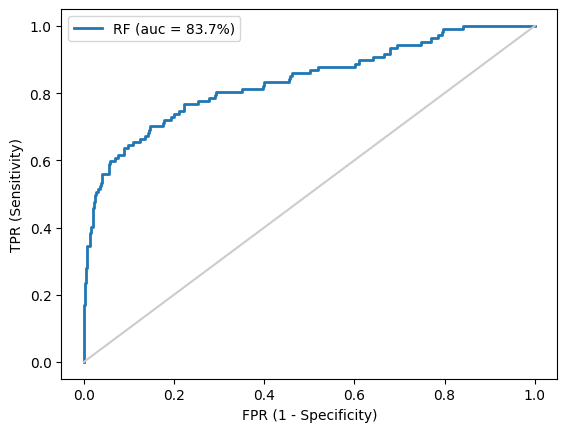

In [66]:
# ROC for RF
fpr_rf, tpr_rf, th_rf = roc_curve(y_val, y_pred_prob_rf[:, -1])

plot_roc_curve([fpr_rf], [tpr_rf], label_list=['RF'], auc_list=[auc_rf])

### Gradient Boosting - Catboost

In [67]:
# Import library
from catboost import CatBoostClassifier

# Set Hyperparameters
N_TREES = 250
LEARNING_RATE = 0.001
N_DEPTH = 5

# Train model
model_cb = CatBoostClassifier(iterations=N_TREES,
                              learning_rate=LEARNING_RATE,
                              depth=N_DEPTH, 
                              verbose=0)
# Fit model
model_cb.fit(X_train_ready, y_train)

In [68]:
# Evaluate model
y_pred_cb = model_cb.predict(X_val_ready)

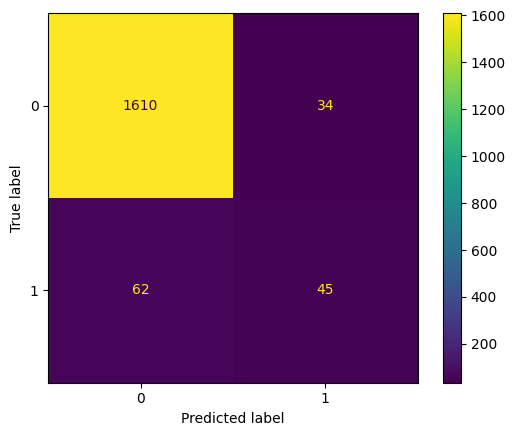

In [69]:
# Display confusion matrix
cm_cb = confusion_matrix(y_true=y_val, y_pred=y_pred_cb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cb, display_labels=model_cb.classes_)
disp.plot()

plt.show()

In [70]:
# Calculate AUC
y_pred_prob_cb = model_cb.predict_proba(X_val_ready)

auc_cb = roc_auc_score(y_val, y_pred_prob_cb[:, -1])
auc_cb

0.8916706460195102

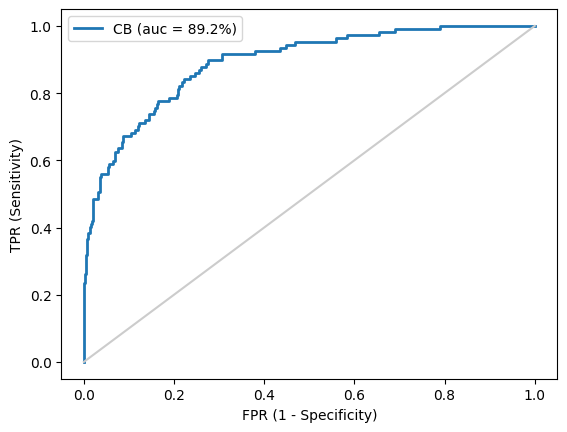

In [71]:
# ROC for RF
fpr_cb, tpr_cb, th_cb = roc_curve(y_val, y_pred_prob_cb[:, -1])

plot_roc_curve([fpr_cb], [tpr_cb], label_list=['CB'], auc_list=[auc_cb])

## Compare model performance for different ML algorithms

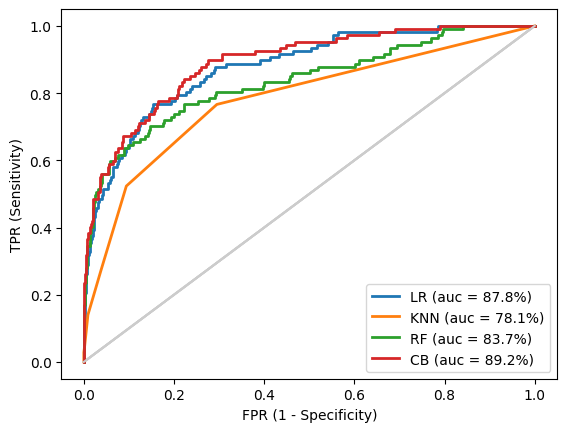

In [72]:
# Compare models using ROC curve
plot_roc_curve([fpr_lr, fpr_knn, fpr_rf, fpr_cb], 
               [tpr_lr, tpr_knn, tpr_rf, tpr_cb], 
               label_list=['LR', 'KNN', 'RF', 'CB'], 
               auc_list=[auc_lr, auc_knn, auc_rf, auc_cb])

# 4. Improve model performance

## 4.1 Address class imbalance

In [73]:
y_train_df = pd.DataFrame({
    'target': y_train
})

y_train_df

,target
0,0
1,0
2,0
3,0
4,0
...,...
6999,0
7000,0
7001,0
7002,0


In [74]:
# combine X_train and y_train into a single DataFrame
y_train_df = pd.DataFrame({
    'target': y_train
})

train_data = pd.concat([X_train_ready, y_train_df], axis=1)

# separate instances of each class
negative_class = train_data[train_data.target==0]
positive_class = train_data[train_data.target==1]

# randomly undersample the majority class
from sklearn.utils import resample

RANDOM_STATE = 101

negative_class_downsampled = resample(negative_class,
                                       replace=False,     # sample without replacement
                                       n_samples=len(positive_class),  # match minority class
                                       random_state=RANDOM_STATE)   # reproducible results

# combine minority class and downsampled majority class
downsampled = pd.concat([negative_class_downsampled, positive_class])
print('downsampled', downsampled.shape)

# separate input features and target variable
X_train_downsampled = downsampled.drop('target', axis=1)
y_train_downsampled = downsampled['target']

downsampled (860, 80)


In [75]:
y_train_downsampled.value_counts(normalize=True)

0    0.5
1    0.5
Name: target, dtype: float64

In [76]:
# Re-train LR after downsampling   ########################################################################################################################

# Train
RANDOM_STATE = 101
model_lr_downsampled = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
model_lr_downsampled.fit(X_train_downsampled, y_train_downsampled)

# Evaluate model
y_pred_lr = model_lr_downsampled.predict(X_val_ready)

# Evaluate
y_pred_prob_lr = model_lr_downsampled.predict_proba(X_val_ready)
auc_lr_after = roc_auc_score(y_val, y_pred_prob_lr[:, -1])
auc_lr_after

0.875179070877959

In [77]:
auc_lr

0.8777599654364783

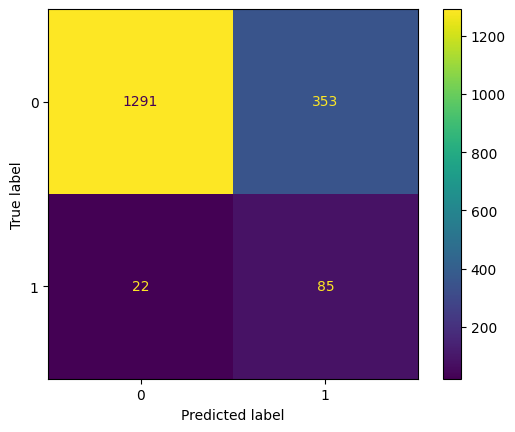

In [78]:
# Display confusion matrix
cm_lr_after = confusion_matrix(y_true=y_val, y_pred=y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_after, display_labels=model_lr_downsampled.classes_)
disp.plot()

plt.show()

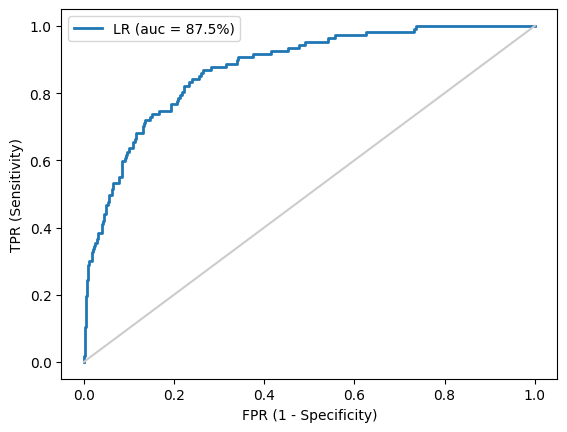

In [79]:
# ROC
fpr_lr, tpr_lr, th_lr = roc_curve(y_val, y_pred_prob_lr[:, -1])

plot_roc_curve([fpr_lr], [tpr_lr], label_list=['LR'], auc_list=[auc_lr_after])

## 5. Feature Importance

In [80]:
# Calculate feature importance
feature_importance = abs(model_lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())

feature_importance

array([1.81289159e+01, 5.35112212e+00, 2.17073748e+01, 1.70115295e-01,
       3.58589557e+00, 1.02586526e+01, 1.00000000e+02, 7.04340095e+00,
       7.15417523e+00, 4.89710783e-03, 5.20345073e+00, 2.65824886e+00,
       9.24543859e+00, 1.72291833e+01, 1.57133876e+01, 3.25623140e+00,
       5.47966209e+00, 3.39312820e-01, 1.07276965e+01, 1.55091876e+00,
       6.78211851e+00, 1.09547411e+01, 1.56149318e+00, 1.20503741e-01,
       4.25960973e+00, 1.43866879e+00, 4.61371214e+00, 3.71815573e+00,
       3.60738146e+00, 9.19921474e+00, 9.30998902e+00, 5.96677977e+00,
       1.90224539e+01, 2.91234773e+00, 1.44367566e+01, 3.38586532e+00,
       2.09779936e-01, 6.92837459e+00, 1.26213431e-01, 7.99675289e+00,
       2.59488914e+01, 2.22749778e+01, 1.55125223e+01, 3.69586179e+01,
       6.97580419e+00, 1.90983974e+01, 6.31439477e-01, 1.64845493e+00,
       6.15474036e+00, 2.99850548e+00, 4.17085904e+00, 2.83114337e+01,
       4.37203407e+00, 8.05454363e+00, 6.13754152e+00, 4.22925347e-01,
      

In [81]:
# Custom function for Feature Importance for LR
import numpy as np

def plot_feature_importance_lr(lr_model, colnames_x, threshold_importance=None):
    # Compute feature importance
    feature_importance = abs(lr_model.coef_[0])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    # Keep strong importance
    if threshold_importance is not None:
        feature_importance = feature_importance[feature_importance > threshold_importance]

    # Plot importance
    idx_sorted = np.argsort(feature_importance)
    pos = np.arange(idx_sorted.shape[0]) + 0.5

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.barh(pos, feature_importance[idx_sorted], align='center')
    ax.set_yticks(pos)
    ax.set_yticklabels(np.array(X.columns)[idx_sorted], fontsize=12)
    ax.set_xlabel('Relative Feature Importance')
    
    plt.tight_layout()   
    plt.show()

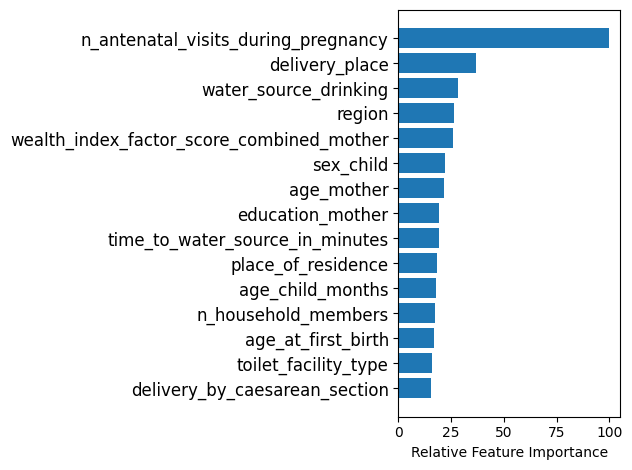

In [82]:
plot_feature_importance_lr(model_lr, colnames_x=X_train_ready.columns, threshold_importance=15)

In [83]:
# Save model for later use   ##################################################################################################################

# Import library
import joblib

# Save model
filepath_model = r'D:\PycharmProjects\mintilo-ai\mintilo_ai\model_lr.pkl'
joblib.dump(model_lr_downsampled, 'model_lr.pkl')

['model_lr.pkl']

# 6. Load saved model and do predictions

In [84]:
# Load saved model
filepath_saved_model = r'D:\PycharmProjects\mintilo-ai\mintilo_ai\model_lr.pkl'
loaded_model = joblib.load(filepath_saved_model)

In [85]:
loaded_model

LogisticRegression(max_iter=1000, random_state=101)

In [86]:
# Do prediction
y_pred = loaded_model.predict(X_val_ready)

In [87]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [88]:
len(y_pred)

1751

In [89]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([1313,  438], dtype=int64))